# UNSUPERVISED ML 

In this task, we will be determining the optimal value of 'k'. This is unsupervised learning as here we are not providing any information like in the case of supervised learnings. It can be used in market segmentation, Clustering DNA patterns.

Here, first of all we will convert categorical data into numerical one and then after normalising the data we will find the optimal value for 'k-means'.

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [31]:
data = pd.read_csv("F:/Dhrumil/r/tableau dataset/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
cat_data = ['Species']
cont_data = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

In [33]:
data[cont_data].describe()      #Description of all numerical data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
#Converting categorical data into numerical. 
#Here we had drop the 1 of the three category as we can figure out its value on the basis of other 2.

dummy = pd.get_dummies (data[cat_data], prefix = cat_data, drop_first = True)
data = pd.concat([data[cont_data], dummy], axis = 1)
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1
149,5.9,3.0,5.1,1.8,0,1


Now, as we can observe the range of numerical data is quite different from the categorical one as the later part are into binary form, thus we will now bring them all into a similar range with the help of MinMaxScaler().

In [40]:
mms = MinMaxScaler()
mms.fit(data)
data_t = mms.transform(data)

ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(data_t)
    ssd.append(km.inertia_)

Here, we will be observing the sum of square of distances between the centroid and nearby point in the data. With the increase in the value of 'k-means' this sum of square value will tends to 0. And for the maximum value of 'k-means' where it is equal to the sample size 'n', each point in the data will make its own cluster as a result of which their sum of square will become 0. Thus number of cluster will be equal to sample size'n'.   

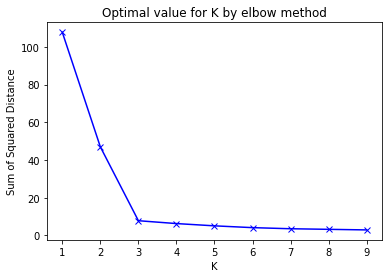

In [41]:
plt.plot(K, ssd, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of Squared Distance')
plt.title('Optimal value for K by elbow method');

As shown above the plot for the different value of 'k-means' against their sum of square value. The value at an elbow of the plot will be considered as an optimal value for 'k-means'.

Thus, here k-means or say optimal number of clusters will be 3....(k = 3).

### Let's now visualize how the data points with cluster value 3 will look like.

As we have k=3, thus each of our data points i.e. 150 will be assigned into exactly one cluster. Where our unique cluster points will be 0, 1 & 2. This we can observe in below scatter plot chart.

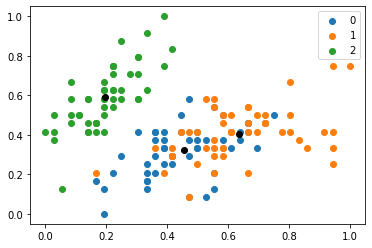

In [67]:
kmeans = KMeans(n_clusters = 3)
label = kmeans.fit_predict(data_t)

u_l = np.unique(label)

centroid = kmeans.cluster_centers_
for i in u_l:
    plt.scatter(data_t[label == i, 0],data_t[label == i, 1], label = i)
plt.scatter(centroid[:, 0],centroid[:, 1], color = 'k')
plt.legend()
plt.show();

Here, the black dots are for the centroid point of the cluster.